In [2]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch


DEVICE = 'cpu'
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = 'cuda'
# elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
#   DEVICE = 'mps'

print(f"Using {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json",
                          merges_file="../data/merges.txt")
model_file = '../data/v1-5-pruned-emaonly.ckpt'
models = model_loader.preload_weights_from_standard_weights(model_file, DEVICE)


/Users/aminjafarzade/miniconda3/envs/stable/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using cpu


100%|██████████| 60/60 [09:36<00:00,  9.62s/it]


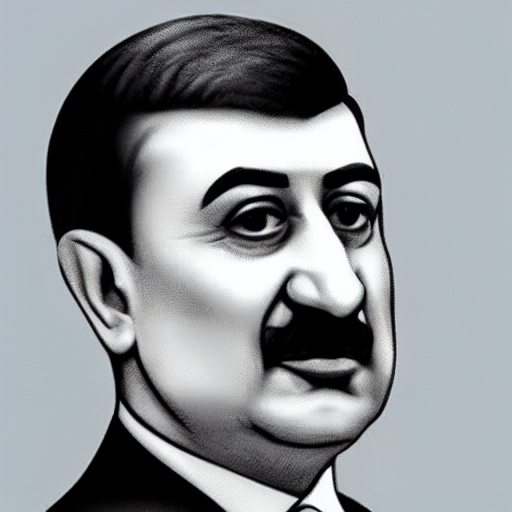

In [6]:
# TEXT to IMAGE
prompt = "Draw Azerbaijani president"
uncond_prompt = ''
do_cfg = True
cfg_scale = 10


# IMAGE to IMAGE
input_image = None
image_path = '../images/dog.jpg'
# input_image = Image.open(image_path)
strength = 0.8

sampler = 'ddpm'
num_inference_steps = 60
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)
